<a href="https://colab.research.google.com/github/balawillgetyou/dy/blob/master/BERTTextClassifier20200304.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Text Classification with DistilBERT and ALBERT models + Hugging Face Transformers + TensorFlow 2.0 + Arun Maiya's excellent wrapper for tf.keras [ktrain](https://github.com/amaiya/ktrain)

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
import ktrain
from ktrain import text

using Keras version: 2.2.4-tf


In [0]:
!pip3 install -q tensorflow_gpu>=2.0

In [2]:
import tensorflow as tf
print(tf.__version__)

2.1.0


In [0]:
!pip3 install -q ktrain

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [10]:
temp_1 = open("/content/gdrive/My Drive/Colab_Notebooks_Bala/WhoseLineIsItAnywayTRAIN.csv", 'r', encoding='latin-1') 
WhoseLineData = pd.read_csv(temp_1)
print(WhoseLineData.shape)

(18977, 2)


In [12]:
WhoseLineData.columns

Index(['text', 'author'], dtype='object')

### Load a Dataset Into Arrays

In [18]:
categories = [0,1,2,3,4,5,6,7,8,9]

WhoseLineData = WhoseLineData.iloc[0:4999,]
WhoseLineData.columns = ['data', 'target_names']

#data split to execute validations using unseen data
train_b, test_b = train_test_split(WhoseLineData, test_size=0.15)
train_b = train_b.reset_index(drop=True)
test_b = test_b.reset_index(drop=True)

print('size of training set: %s' % (len(train_b['data'])))
print('size of validation set: %s' % (len(test_b['data'])))
print('classes: %s' % (categories))

x_train = train_b.data
y_train = train_b.target_names
x_test = test_b.data
y_test = test_b.target_names

size of training set: 4249
size of validation set: 750
classes: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


##Model1: Using [DistilBERT](https://arxiv.org/abs/1910.01108)

In [21]:
#STEP 1:  Preprocess Data and Create a Transformer Model
MODEL_NAME = 'distilbert-base-uncased'
t = text.Transformer(MODEL_NAME, maxlen=500, classes=categories)
trn = t.preprocess_train(x_train, y_train)
val = t.preprocess_test(x_test, y_test)
model = t.get_classifier()
learner = ktrain.get_learner(model, train_data=trn, val_data=val, batch_size=6)

/usr/local/lib/python3.6/dist-packages/ktrain/text/preprocessor.py:324: UserWarning: The class_names argument is replacing the classes argument. Please update your code.
  warnings.warn('The class_names argument is replacing the classes argument. Please update your code.')



preprocessing train...
language: en
train sequence lengths:
	mean : 392
	95percentile : 751
	99percentile : 1395


preprocessing test...
language: en
test sequence lengths:
	mean : 396
	95percentile : 755
	99percentile : 1201


In [22]:
#STEP 2:  Train the Model
learner.fit_onecycle(5e-5, 4)



begin training using onecycle policy with max lr of 5e-05...
Train for 709 steps, validate for 125 steps
Epoch 1/4
709/709 [==============================] - 177s 250ms/step - loss: 1.1868 - accuracy: 0.6230 - val_loss: 0.5132 - val_accuracy: 0.8320
Epoch 2/4
709/709 [==============================] - 168s 238ms/step - loss: 0.3441 - accuracy: 0.8941 - val_loss: 0.2467 - val_accuracy: 0.9227
Epoch 3/4
709/709 [==============================] - 169s 238ms/step - loss: 0.1355 - accuracy: 0.9588 - val_loss: 0.1521 - val_accuracy: 0.9547
Epoch 4/4
709/709 [==============================] - 168s 237ms/step - loss: 0.0270 - accuracy: 0.9934 - val_loss: 0.1372 - val_accuracy: 0.9533


In [41]:
#STEP 3: Evaluate and Inspect the Model
learner.validate(class_names=['0','1','2','3','4','5','6','7','8','9'])

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       178
           1       0.94      0.94      0.94        18
           2       0.99      0.96      0.97        99
           3       0.96      1.00      0.98        54
           4       0.97      0.93      0.95       123
           5       0.94      0.95      0.94       116
           6       0.93      0.96      0.95        28
           7       0.91      0.87      0.89        47
           8       0.94      0.94      0.94        48
           9       1.00      0.97      0.99        39

    accuracy                           0.95       750
   macro avg       0.95      0.95      0.95       750
weighted avg       0.95      0.95      0.95       750



array([[174,   0,   1,   0,   2,   1,   0,   0,   0,   0],
       [  0,  17,   0,   0,   0,   0,   0,   1,   0,   0],
       [  1,   0,  95,   0,   0,   2,   0,   0,   1,   0],
       [  0,   0,   0,  54,   0,   0,   0,   0,   0,   0],
       [  4,   0,   0,   0, 114,   1,   2,   2,   0,   0],
       [  3,   0,   0,   0,   1, 110,   0,   0,   2,   0],
       [  0,   0,   0,   0,   0,   0,  27,   1,   0,   0],
       [  3,   1,   0,   1,   0,   1,   0,  41,   0,   0],
       [  1,   0,   0,   0,   0,   2,   0,   0,  45,   0],
       [  0,   0,   0,   1,   0,   0,   0,   0,   0,  38]])

Excellent performance!!

##Explaining predictions
USing ktrain's explain method which relies on forked version of the eli5 library that supporte TensorFlow Keras.

In [32]:
!pip3 install -q git+https://github.com/amaiya/eli5@tfkeras_0_10_1

In [33]:
predictor = ktrain.get_predictor(learner.model, preproc=t)
predictor.explain(x_test[0])

In [0]:
predictor.save('/content/gdrive/My Drive/Colab_Notebooks_Bala/distilbertTextClassifier20200304')

In [0]:
reloaded_predictor = ktrain.load_predictor('/tmp/distilbertTextClassifier20200304')

In [37]:
reloaded_predictor.predict(x_test[0])

5

#Model2: Using [ALBERT](https://arxiv.org/abs/1909.11942)

In [45]:
#STEP 1: Preprocess Data and Create a Transformer Model
MODEL_NAME = 'albert-large-v2'
t = text.Transformer(MODEL_NAME, maxlen=500, class_names=categories)
trn = t.preprocess_train(x_train, y_train)
val = t.preprocess_test(x_test, y_test)
model = t.get_classifier()
learner = ktrain.get_learner(model, train_data=trn, val_data=val, batch_size=6)

preprocessing train...
language: en
train sequence lengths:
	mean : 392
	95percentile : 751
	99percentile : 1395


preprocessing test...
language: en
test sequence lengths:
	mean : 396
	95percentile : 755
	99percentile : 1201


simulating training for different learning rates... this may take a few moments...
Train for 708 steps
Epoch 1/2
 18/708 [..............................] - ETA: 14:20 - loss: 0.0322 - accuracy: 0.9907

done.


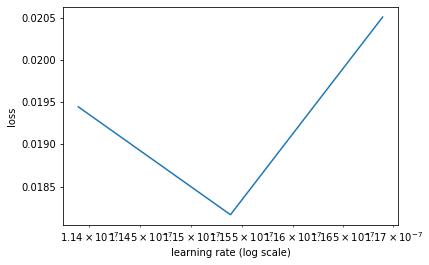

In [58]:
#exploring learning rate
learner.lr_find(show_plot=True, max_epochs=2)

In [46]:
#STEP 2: Train the Model
learner.fit_onecycle(5e-5, 4)



begin training using onecycle policy with max lr of 5e-05...
Train for 709 steps, validate for 125 steps
Epoch 1/4
709/709 [==============================] - 944s 1s/step - loss: 1.7196 - accuracy: 0.3756 - val_loss: 1.1201 - val_accuracy: 0.6187
Epoch 2/4
709/709 [==============================] - 915s 1s/step - loss: 0.9441 - accuracy: 0.6860 - val_loss: 0.8071 - val_accuracy: 0.7240
Epoch 3/4
709/709 [==============================] - 915s 1s/step - loss: 0.4766 - accuracy: 0.8369 - val_loss: 0.3913 - val_accuracy: 0.8813
Epoch 4/4
709/709 [==============================] - 914s 1s/step - loss: 0.1471 - accuracy: 0.9539 - val_loss: 0.2191 - val_accuracy: 0.9307


In [47]:
#STEP 3: Evaluate and Inspect the Model
learner.validate(class_names=['0','1','2','3','4','5','6','7','8','9'])

              precision    recall  f1-score   support

           0       0.96      0.91      0.94       178
           1       0.89      0.94      0.92        18
           2       0.94      0.96      0.95        99
           3       0.96      0.98      0.97        54
           4       0.91      0.96      0.93       123
           5       0.90      0.91      0.91       116
           6       1.00      0.89      0.94        28
           7       0.90      0.91      0.91        47
           8       0.96      0.90      0.92        48
           9       0.88      0.92      0.90        39

    accuracy                           0.93       750
   macro avg       0.93      0.93      0.93       750
weighted avg       0.93      0.93      0.93       750



array([[162,   0,   0,   0,   9,   4,   0,   1,   0,   2],
       [  0,  17,   0,   0,   0,   0,   0,   1,   0,   0],
       [  1,   0,  95,   0,   0,   3,   0,   0,   0,   0],
       [  0,   0,   0,  53,   1,   0,   0,   0,   0,   0],
       [  1,   0,   0,   0, 118,   3,   0,   1,   0,   0],
       [  1,   0,   3,   1,   1, 106,   0,   0,   2,   2],
       [  0,   1,   0,   0,   0,   1,  25,   1,   0,   0],
       [  1,   1,   0,   0,   1,   0,   0,  43,   0,   1],
       [  1,   0,   3,   0,   0,   1,   0,   0,  43,   0],
       [  1,   0,   0,   1,   0,   0,   0,   1,   0,  36]])

######Not as good as DistilBERT

In [48]:
#STEP 4: Making Predictions
predictor = ktrain.get_predictor(learner.model, preproc=t)
print(predictor.predict(x_test[0]))
# predicted probability scores for each category
print(predictor.predict_proba(x_test[0]))

5


[2.7968700e-04 5.9527501e-05 5.4369436e-04 1.2787296e-04 2.7895151e-04
 9.9604863e-01 6.0292153e-04 1.8230794e-04 1.7263689e-03 1.5000062e-04]


###Model explanation with eli5

In [49]:
predictor.explain(x_test[0])

In [0]:
#/content/gdrive/My Drive/Colab_Notebooks_Bala/
predictor.save('/content/gdrive/My Drive/Colab_Notebooks_Bala/albertTextClassifier20200304')

In [0]:
reloaded_predictor = ktrain.load_predictor('/tmp/distilbertTextClassifier20200304')

In [52]:
reloaded_predictor.predict(x_test[0])

5